# Discovering Dynamic Patterns from Coronavirus Data using Dynamic Mode Decomposition with Control: US State Data

## Import Data

In [2]:
# package imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from pydmd import DMD,DMDc,DMDBase
from datetime import timedelta, date, datetime
import re 
from urllib.request import urlopen
import json
import plotly.express as px
from control.matlab import *
# Note: Python control toolbox can be found at at https://python-control.readthedocs.io/
import slycot
import scipy 

# for dark theme
plt.rcParams['text.color'] = 'white'
plt.rcParams.update({'text.color' : "white",
                     'axes.labelcolor' : "white",
                    'xtick.color' : "white",
                    'ytick.color' : "white"})

In [3]:
# for light theme
plt.rcParams['text.color'] = 'black'
plt.rcParams.update({'text.color' : "black",
                     'axes.labelcolor' : "black",
                    'xtick.color' : "black",
                    'ytick.color' : "black"})

In [4]:
# import csse_covid_19_daily_reports

# create data frame:
# list of states
states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]


statesA = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]


In [5]:
# add later date data

rowsum = pd.DataFrame()
stateData = pd.DataFrame()
threshold = 2; # threshold for minimum number of days cutoff

In [6]:
start_date = date(2020, 1, 22)
end_date = date(2020, 1, 31)

for single_date in pd.date_range(start_date, end_date):
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    daily = pd.read_csv(url, error_bad_lines=False)
    for state in states:
        totalInState = daily.loc[daily['Province/State'] == state]
        title = totalInState.loc[:,'Province/State':'Province/State']
        if totalInState.empty == False:
            title = title.iloc[[0],:]
            rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
            if (np.transpose(rowSum).Confirmed.all()>=threshold): #for threshold
                newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
    if (newStateData.empty == False): #for threshold
        newStateData = newStateData.set_index('Province/State').drop(columns=['index'])
        stateData = pd.concat([stateData,newStateData],axis=1)

In [7]:
start_date = date(2020, 2, 1)
end_date = date(2020, 3, 9)

for single_date in pd.date_range(start_date, end_date):
    stateIter = iter(states)
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    daily = pd.read_csv(url, error_bad_lines=False)

    for state in statesA:
        stateName = next(stateIter)
        totalInState = daily.loc[daily['Country/Region'] == 'US']
        totalInState = totalInState.loc[totalInState['Province/State'].str.contains(state)]
        if totalInState.empty == False:
            title = totalInState.loc[:,'Province/State':'Province/State']
            title = title.iloc[[0],:]
            title.at[:,'Province/State']= stateName
            rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
            if (np.transpose(rowSum).Confirmed.all()>=threshold):
                newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
    if (newStateData.empty == False):
        newStateData = newStateData.set_index('Province/State').drop(columns=['index'])
        stateData = pd.concat([stateData,newStateData],axis=1)

In [8]:
start_date = date(2020, 3, 10)
end_date = date(2020, 3, 21)

for single_date in pd.date_range(start_date, end_date):
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    daily = pd.read_csv(url, error_bad_lines=False)
    for state in states:
        totalInState = daily.loc[daily['Province/State'] == state]
        title = totalInState.loc[:,'Province/State':'Province/State']
        if (totalInState.empty == False):
                title = title.iloc[[0],:]
                rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
                if (np.transpose(rowSum).Confirmed.all()>=threshold):
                    newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
    if (newStateData.empty == False):
        newStateData = newStateData.set_index('Province/State').drop(columns=['index'])
        stateData = pd.concat([stateData,newStateData],axis=1)


In [9]:
start_date = date(2020, 3, 22)
end_date = end_date = datetime.date(datetime.now())

for single_date in pd.date_range(start_date, end_date):
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    try:
        daily = pd.read_csv(url, error_bad_lines=False)
        for state in states:
            totalInState = daily.loc[daily['Province_State'] == state]
            title = totalInState.loc[:,'Province_State':'Province_State']
            if totalInState.empty == False:
                title = title.iloc[[0],:]
                rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
                if (np.transpose(rowSum).Confirmed.all()>=threshold):
                    newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
        if (newStateData.empty == False):
            newStateData = newStateData.set_index('Province_State').drop(columns=['index'])
            stateData = pd.concat([stateData,newStateData],axis=1)
    except:
        print('Todays file has not yet been uploaded')

Todays file has not yet been uploaded


In [10]:
stateData = stateData.fillna(0)
stateData

03-22-2020  03-23-2020  03-24-2020  03-25-2020  03-26-2020  \
Province_State                                                               
Alabama                157         196         242         381         517   
Alaska                  20          30          34          41          56   
Arizona                152         235         326         401         508   
Arkansas               165         192         219         280         335   
California            1646        2108        2538        2998        3899   
Colorado               591         704         723        1021        1430   
Connecticut            327         415         618         875        1012   
Delaware                56          68         104         119         130   
Florida               1004        1227        1412        1682        2357   
Georgia                621         772        1026        1247        1525   
Hawaii                  53          56          90          91          95   
Idaho                   42          68          81          91         146   
Illinois              1049        1285        1537        1865        2538   
Indiana                204         270         368         477         645   
Iowa                    90         105         124         146         179   
Kansas                  65          84         100         134         172   
Kentucky               103         123         162         197         247   
Louisiana              837        1172        1388        1795        2304   
Maine                   89         107         118         142         155   
Maryland               244         290         349         425         583   
Massachusetts          646         777        1159        1838        2417   
Michigan              1035        1329        1793        2296        2845   
Minnesota              167         234         261         286         344   
Mississippi            207         249         320         377         485   
Missouri                87         187         257         354         520   
Montana                 34          34          51          65          90   
Nebraska                51          51          66          71          74   
Nevada                 190         245         278         323         420   
New Hampshire           74         101         101         108         137   
New Jersey            1914        2844        3675        4402        6876   
New Mexico              57          83         100         113         113   
New York             15800       20884       25681       30841       37877   
North Carolina         305         353         495         590         738   
North Dakota            28          30          36          45          51   
Ohio                   356         443         567         704         868   
Oklahoma                67          81         106         164         248   
Oregon                 161         191         210         266         316   
Pennsylvania           509         698         946        1260        1795   
Rhode Island            83         106         124         132         165   
South Carolina         196         298         342         424         424   
South Dakota            21          28          30          41          46   
Tennessee              505         614         772         916        1097   
Texas                  643         758         955        1229        1563   
Utah                   162         257         298         340         396   
Vermont                 52          75          95         125         158   
Virginia               220         254         293         396         466   
Washington            1997        2221        2328        2591        3207   
West Virginia           16          16          22          39          52   
Wisconsin              381         425         481         621         728   
Wyoming                 26          26

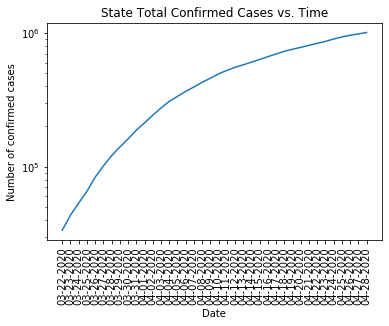

In [11]:
# plot confirmed cases vs. time
plt.title('State Total Confirmed Cases vs. Time')

plt.plot(stateData.loc[:,'01-22-2020':].sum())

plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.yscale('log')
plt.xticks(rotation='vertical')

plt.show()

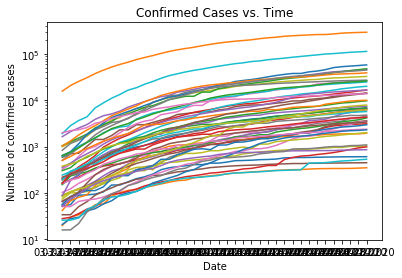

In [12]:
# plot confirmed cases vs. time
plt.title('Confirmed Cases vs. Time')

plt.plot(np.transpose(stateData.loc[:,'01-22-2020':]))

plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.yscale('log')


plt.show()

## Convert Data into an Array

In order to make most initial conditions greater than zero, the start date was chosen to be that in which all states reach an indicated threshold.  This will increase the accuracy of the reconstruction in time.

In [13]:
# Select data with few initial conditions of 0
scaledData = stateData
# Convert data to array
scaledData = scaledData.to_numpy()
scaledData

array([[ 157,  196,  242, ..., 6421, 6539, 6750],
       [  20,   30,   34, ...,  340,  345,  351],
       [ 152,  235,  326, ..., 6534, 6725, 6955],
       ...,
       [  16,   16,   22, ..., 1055, 1063, 1095],
       [ 381,  425,  481, ..., 5912, 6081, 6289],
       [  26,   26,   29, ...,  502,  520,  536]], dtype=int64)

## Take DMD

**Modes**: Columns are the low-rank structures individuated


**Dynamics**: Rows refer to the time evolution of each mode


**Eigs**: eigenvalues of the low dimensional operator

* If an eigenvalue is on the unit circle, the corresponding mode will be stable; while if an eigenvalue is inside or outside the unit circle, the mode will converge or diverge, respectively.

**Reconstructed_data**: the approximated system evolution

### DMD

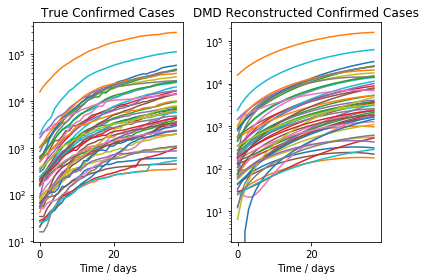

In [14]:
dmd = DMD(svd_rank=3) # truncated SVD
dmd.fit(scaledData)

# plot true data
plt.subplot(1, 2, 1)
plt.title('True Confirmed Cases')
plt.plot(scaledData.T)
plt.xlabel('Time / days')
plt.yscale('log')

# plot dmd reconstructed data
plt.subplot(1, 2, 2)
plt.title('DMD Reconstructed Confirmed Cases')
plt.plot(dmd.reconstructed_data.real.T)
plt.xlabel('Time / days')
plt.yscale('log')
plt.tight_layout()

plt.show()

Eigenvalue (1.0284076290158959+0.05105042142130858j): distance from unit circle 0.06022839694538984
Eigenvalue (1.0284076290158959-0.05105042142130858j): distance from unit circle 0.06022839694538984
Eigenvalue (0.994211706161953+0j): distance from unit circle 0.01154308333053844


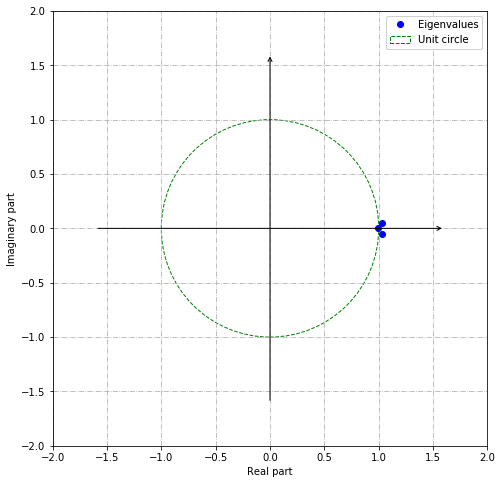

In [15]:
# eigenvalues of low dim operator

for eig in dmd.eigs:
    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(eig.imag**2+eig.real**2 - 1)))
dmd.plot_eigs(show_axes=True, show_unit_circle=True)


The eigenvalues are discrete, so their placement corresponds to the time sequences below:

![title](img/rootLocusPoleLocations.PNG)

All eigenvalues inside of the unit circle converge to a final value, while the eigenvalues outside of the unit circle are unstable (do not converge).  The unstable eigenvalues correspond to unstable modes.  Most eigenvalues are located on the positive real axis, corresponding to low frequency dynamics.

Eigenvalue 0.029242176865154873, 0.049599545757106886
Eigenvalue 0.029242176865154873, -0.049599545757106886
Eigenvalue -0.005805110937098228, 0.0


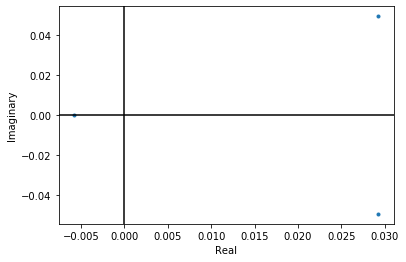

In [16]:
# Continuous Eigenvalues

plt.plot(np.log(dmd.eigs).real,np.log(dmd.eigs).imag,'.')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('Real')
plt.ylabel('Imaginary')

for eig in dmd.eigs:
    print('Eigenvalue {}, {}'.format(np.log(eig).real, np.log(eig).imag))

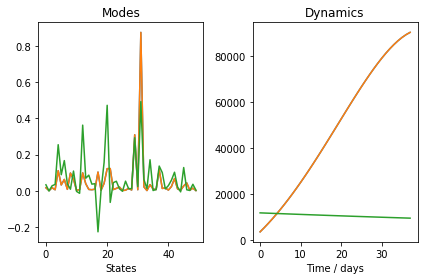

In [17]:
# modes
plt.subplot(1, 2, 1)
for mode in dmd.modes.T:
    plt.plot(mode.real)
    plt.title('Modes')
    plt.xlabel('States')


# dynamics
plt.subplot(1, 2, 2)
for dynamic in dmd.dynamics:
    plt.plot(dynamic.real)
    plt.title('Dynamics')
    plt.xlabel('Time / days')
plt.tight_layout()

plt.show()

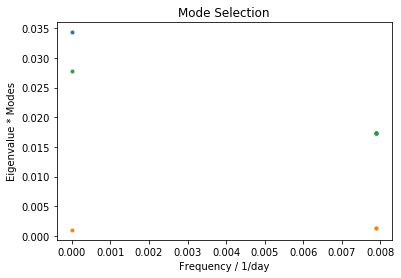

In [18]:
# Mode Selection

# Continuous Time Oscillatory Frequency for 24 hour period (units 1/h)
freq = (np.log(dmd.eigs)).imag/(2*np.pi)

i = 0
for eig in dmd.eigs:
    plt.plot(abs(freq),(abs(dmd.modes.real*eig))[i,:],'.')
    i+=1
plt.title('Mode Selection')
plt.xlabel('Frequency / 1/day')
plt.ylabel('Eigenvalue * Modes')
plt.show()


In [19]:
# Modes map

dmd = DMD(svd_rank=1)
dmd.fit(scaledData) # transpose so snapshots (state data) are arranged by column


with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
df = dynamic.real
fig = px.choropleth(df,    locations=statesA,  
                           locationmode="USA-states",
                           color=abs(dmd.modes),
                           range_color=(0,0.9),
                           scope="usa",
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Predict

1. Reduce data from last time step using dynamic modes:
$$
\mathbf{x}_k^{\sim} = U^{+}\mathbf{x}_k
$$

2. Use previous reduced data time step to get the next reduced data array:
$$
\mathbf{x}_{k+1}^{\sim} = \mathbf{A}\mathbf{x}_k^{\sim} 
$$

3. Multiply the reduced data by the modes to obtain the predicted data array:
$$
\mathbf{x}_{k} = \mathbf{U}\mathbf{x}_k^{\sim} 
$$

In [20]:
# Take DMD of data
dmd = DMD(svd_rank=3) # truncated SVD
dmd.fit(scaledData)

At = dmd.atilde #Koopman operator


In [21]:
# compute reduced data prediction and actual data prediction

# Intialize
days = 100 # number of days in the future to predict
x = np.zeros((len(scaledData[:,-1]),days)) # actual prediction
xt = np.zeros((len(At),days)) # reduced prediction
x[:,0] = scaledData[:,-1]
xt[:,0] = np.matmul(np.linalg.pinv(dmd.modes),scaledData[:,-1])

# Iterate to produce actual and reduced predictions
for i in range(1,days):
    xt[:,i] = np.matmul(At,xt[:,i-1])
    x[:,i] = np.matmul(dmd.modes,xt[:,i])

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: ComplexWarning:

Casting complex values to real discards the imaginary part



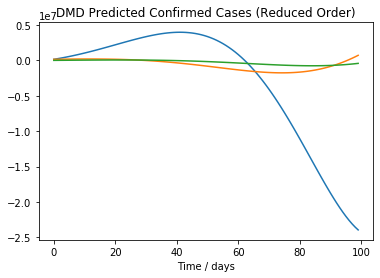

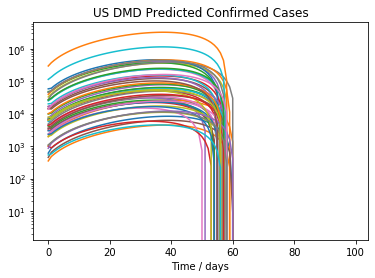

In [22]:
# Plot predicted cases
plt.plot(xt.T)
plt.title('DMD Predicted Confirmed Cases (Reduced Order)')
plt.xlabel('Time / days')
plt.show()

plt.plot(x.T)
plt.title('US DMD Predicted Confirmed Cases')
plt.xlabel('Time / days')
plt.yscale('log')
plt.show()

#### Testing prediction accuracy:

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: ComplexWarning:

Casting complex values to real discards the imaginary part



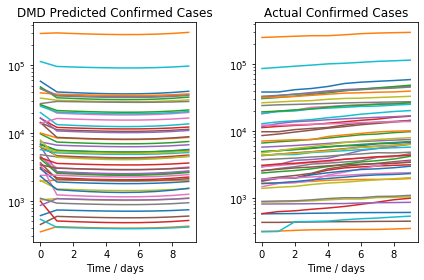

In [23]:
# Take DMD of data
days = 10 # number of days in the future to predict
testDays = np.size(scaledData,1)-days

dmd = DMD(svd_rank=3) # truncated SVD
dmd.fit(scaledData[:,:testDays]) # fit for selected days

At = dmd.atilde #Koopman operator

# compute reduced data prediction and actual data prediction

# Intialize
x = np.zeros((len(scaledData[:,testDays*-1]),days)) # actual prediction
xt = np.zeros((len(At),days)) # reduced prediction
x[:,0] = scaledData[:,-1]
xt[:,0] = np.matmul(np.linalg.pinv(dmd.modes),scaledData[:,-1])

# Iterate to produce actual and reduced predictions
for i in range(1,days):
    xt[:,i] = np.matmul(At,xt[:,i-1])
    x[:,i] = np.matmul(dmd.modes,xt[:,i])
    
plt.subplot(1, 2, 1)
plt.plot(x.T)
plt.title('DMD Predicted Confirmed Cases')
plt.xlabel('Time / days')
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.plot(scaledData[:,testDays:].T)
plt.title('Actual Confirmed Cases')
plt.xlabel('Time / days')
plt.yscale('log')
plt.tight_layout()

plt.show()


In [24]:
['Predicted Day {}: Mean Error {} %, Standard Deviation of Error +/-{} %'.format(i+1,np.mean(np.abs(x[:,i]-scaledData[:,i+testDays])/scaledData[:,i+testDays])*100,np.std(np.abs(x[:,i]-scaledData[:,i+testDays])/scaledData[:,i+testDays])*100) for i in range(days)]

['Predicted Day 1: Mean Error 44.65416177622015 %, Standard Deviation of Error +/-26.7683677217557 %',
 'Predicted Day 2: Mean Error 13.450081348663662 %, Standard Deviation of Error +/-9.481123625376453 %',
 'Predicted Day 3: Mean Error 11.435920521261652 %, Standard Deviation of Error +/-9.307203574153105 %',
 'Predicted Day 4: Mean Error 12.719121586409777 %, Standard Deviation of Error +/-9.267889774737133 %',
 'Predicted Day 5: Mean Error 15.336937495487934 %, Standard Deviation of Error +/-10.589457250399628 %',
 'Predicted Day 6: Mean Error 18.522546758186117 %, Standard Deviation of Error +/-11.366986990498578 %',
 'Predicted Day 7: Mean Error 20.67042774890153 %, Standard Deviation of Error +/-12.48764008649828 %',
 'Predicted Day 8: Mean Error 22.198993059526238 %, Standard Deviation of Error +/-13.081544995481636 %',
 'Predicted Day 9: Mean Error 22.761001816747513 %, Standard Deviation of Error +/-13.534058140441424 %',
 'Predicted Day 10: Mean Error 23.055677526451174 %, S

Predictions are only valid for about 10 days.  The highest accuracy predictions occur at an svd rank of 3.

#### Testing prediction accuracy for the data set excluding NY

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: ComplexWarning:

Casting complex values to real discards the imaginary part



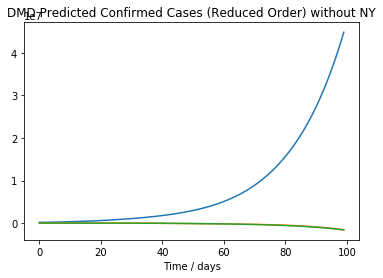

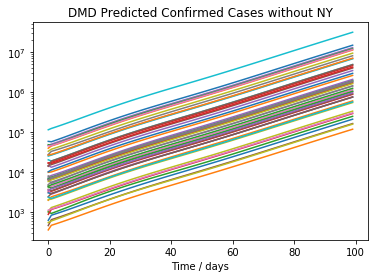

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: ComplexWarning:

Casting complex values to real discards the imaginary part



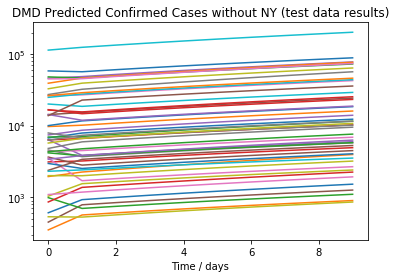

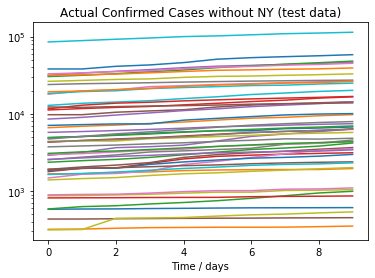

['Predicted Day 1: Mean Error 45.17601840318671 %, Standard Deviation of Error +/-26.787164301148618 %',
 'Predicted Day 2: Mean Error 46.412656408553595 %, Standard Deviation of Error +/-17.36906225084299 %',
 'Predicted Day 3: Mean Error 50.57922107885743 %, Standard Deviation of Error +/-19.503106447569987 %',
 'Predicted Day 4: Mean Error 54.04102450743331 %, Standard Deviation of Error +/-21.722548898521637 %',
 'Predicted Day 5: Mean Error 56.58208921840233 %, Standard Deviation of Error +/-24.32587922246161 %',
 'Predicted Day 6: Mean Error 59.1727768580618 %, Standard Deviation of Error +/-27.341052876485705 %',
 'Predicted Day 7: Mean Error 62.80562295661879 %, Standard Deviation of Error +/-30.547368531167653 %',
 'Predicted Day 8: Mean Error 66.38986674848145 %, Standard Deviation of Error +/-33.23951613188888 %',
 'Predicted Day 9: Mean Error 71.18479384249964 %, Standard Deviation of Error +/-36.38693967004672 %',
 'Predicted Day 10: Mean Error 74.90049358297128 %, Standar

In [25]:
sData = stateData.drop(['New York']).to_numpy()

# Take DMD of data
dmd = DMD(svd_rank=3) # truncated SVD
dmd.fit(sData)

At = dmd.atilde #Koopman operator

# compute reduced data prediction and actual data prediction

# Intialize
days = 100 # number of days in the future to predict
x = np.zeros((len(sData[:,-1]),days)) # actual prediction
xt = np.zeros((len(At),days)) # reduced prediction
x[:,0] = sData[:,-1]
xt[:,0] = np.matmul(np.linalg.pinv(dmd.modes),sData[:,-1])

# Iterate to produce actual and reduced predictions
for i in range(1,days):
    xt[:,i] = np.matmul(At,xt[:,i-1])
    x[:,i] = np.matmul(dmd.modes,xt[:,i])
    
# Plot predicted cases
plt.plot(xt.T)
plt.title('DMD Predicted Confirmed Cases (Reduced Order) without NY')
plt.xlabel('Time / days')
plt.show()

plt.plot(x.T)
plt.title('DMD Predicted Confirmed Cases without NY')
plt.xlabel('Time / days')
plt.yscale('log')
plt.show()

# Take DMD of data
days = 10 # number of days in the future to predict
testDays = np.size(sData,1)-days

dmd = DMD(svd_rank=3) # truncated SVD
dmd.fit(sData[:,:testDays]) # fit for selected days

At = dmd.atilde #Koopman operator

# compute reduced data prediction and actual data prediction

# Intialize
x = np.zeros((len(sData[:,testDays*-1]),days)) # actual prediction
xt = np.zeros((len(At),days)) # reduced prediction
x[:,0] = sData[:,-1]
xt[:,0] = np.matmul(np.linalg.pinv(dmd.modes),sData[:,-1])

# Iterate to produce actual and reduced predictions
for i in range(1,days):
    xt[:,i] = np.matmul(At,xt[:,i-1])
    x[:,i] = np.matmul(dmd.modes,xt[:,i])
    
plt.plot(x.T)
plt.title('DMD Predicted Confirmed Cases without NY (test data results)')
plt.xlabel('Time / days')
plt.yscale('log')
plt.show()

plt.plot(sData[:,testDays:].T)
plt.title('Actual Confirmed Cases without NY (test data)')
plt.xlabel('Time / days')
plt.yscale('log')
plt.show()

['Predicted Day {}: Mean Error {} %, Standard Deviation of Error +/-{} %'.format(i+1,np.mean(np.abs(x[:,i]-sData[:,i+testDays])/sData[:,i+testDays])*100,np.std(np.abs(x[:,i]-sData[:,i+testDays])/sData[:,i+testDays])*100) for i in range(days)]

Excluding NY sometimes results in greater accuracy (removing the outlier).

### DMDc: DMD with Control

Since we want to add the control, the evolution of the complex system can be formally summarized as:$$
\mathbf{x}_{k+1} = \mathbf{A}\mathbf{x}_k + \mathbf{B}\mathbf{u}_k,
$$where the operators $\mathbf{A}$ and $\mathbf{B}$ are the ones we will approximate using DMD.

In [26]:
dmdc = DMDc()
dmdc.fit(scaledData, np.zeros(np.size(scaledData,1)-1)) # fit dmdc with no control

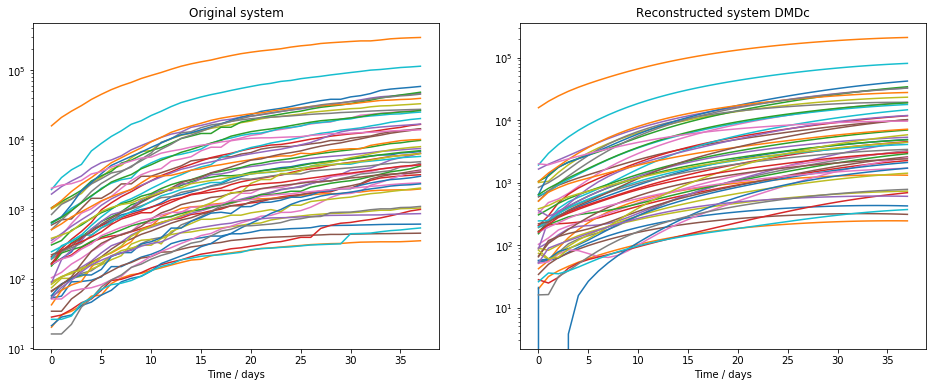

In [27]:
# plot reconstructed system

plt.figure(figsize=(16,6))

plt.subplot(121)
plt.title('Original system')
plt.xlabel('Time / days')
plt.yscale('log')
plt.plot(scaledData.T)

plt.subplot(122)
plt.title('Reconstructed system DMDc')
plt.xlabel('Time / days')
plt.yscale('log')
plt.plot(dmdc.reconstructed_data().real.T)



plt.show()

#### Determine Optimal Input for Control

In [103]:

# State space system
dmd = DMD(svd_rank=3)
dmd.fit(scaledData)

# Define linear systems (in state-space form)
A = dmd.atilde # # of days x # of days
Ac = scipy.linalg.logm(A) # find equivalent continuous-time A matrix
B = np.ones((len(A),1))
B[:,0] = 1
C = np.ones((1,len(A)))

# system parameters
x0 = np.matmul(np.linalg.pinv(dmd.modes),scaledData[:,-1]) # initial condition 
t = np.arange(0,50,1);

sys1 = StateSpace(Ac,B,C,0)
sys1tf = ss2tf(sys1)
sys1tf



        3 s^2 - 0.247 s + 0.0008641
------------------------------------------
s^3 - 0.05268 s^2 + 0.002976 s + 1.925e-05

C:\Users\julia\Anaconda3\lib\site-packages\control\timeresp.py:318: ComplexWarning:

Casting complex values to real discards the imaginary part



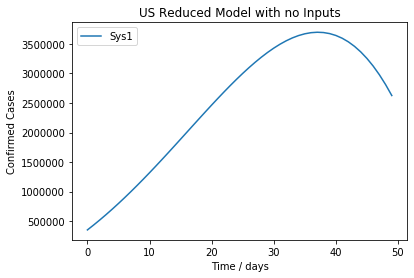

In [104]:
# With no input, these will be the same

yout1,t1,xout1 = lsim(sys1,U = 0.0, T = t, X0 = x0)
fig, ax = plt.subplots()
ax.plot(t,yout1,label='Sys1')
leg = ax.legend();

plt.title('US Reduced Model with no Inputs')
plt.xlabel('Time / days')
plt.ylabel('Confirmed Cases');

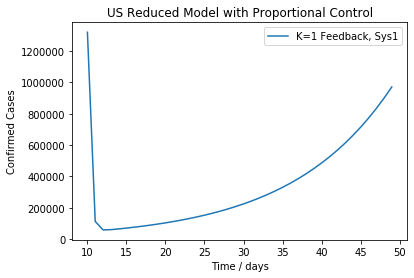

In [105]:
# Try proportional control
sysfb1 = feedback(sys1,1)
fbind = 10 # time index when feedback starts

# Run closed-loop systems
youtfb1,tfb1,xoutfb1 = lsim(sysfb1, T = t[fbind:], X0 = xout1[fbind])

# Plot results
fig, ax = plt.subplots()
ax.plot(tfb1,youtfb1,label='K=1 Feedback, Sys1')



plt.title('US Reduced Model with Proportional Control')
plt.xlabel('Time / days')
plt.ylabel('Confirmed Cases');

leg = ax.legend();

C:\Users\julia\Anaconda3\lib\site-packages\control\timeresp.py:318: ComplexWarning:

Casting complex values to real discards the imaginary part



K values: [[ -4.98533248 -39.18119903  49.82445647]]
S values: [[  36.9917269   126.08342287 -163.57368301]
 [ 126.08342287  806.35994317 -936.36148594]
 [-163.57368301 -936.36148594 1104.91761461]]
P values: [-5.4763584 +0.j         -0.06444355+0.03151214j -0.06444355-0.03151214j]


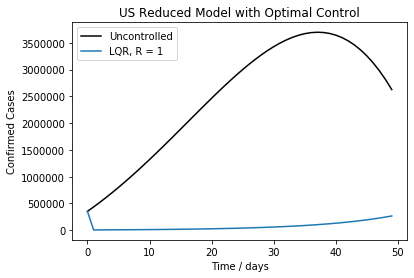

In [108]:
# LQR control

Q = np.identity(len(A));
R = 1;
Klqr1,Slqr1,Plqr1 = lqr(Ac,B,Q,R) 

sysLQR1 = StateSpace(Ac- Klqr1*B,B,C,0)

youtfb1,tfb1,xoutfb1 = lsim(sysLQR1, T = t, X0 = x0)

fig, ax = plt.subplots()
ax.plot(t,yout1,'k',label='Uncontrolled')
ax.plot(tfb1,youtfb1,label='LQR, R = 1')
leg = ax.legend()
plt.title('US Reduced Model with Optimal Control')
plt.xlabel('Time / days')
plt.ylabel('Confirmed Cases');




print('K values:', Klqr1)
print('S values:', Slqr1)
print('P values:', Plqr1)


